In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D

# read
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = N x row x col
img_rows = x_train.shape[1] # 28
img_cols = x_train.shape[2] # 28

batch_size = 128 # mini-batch의 크기, 전체 batch 크기는 6만개 
num_classes = 10 # class의 개수
epochs = 10 # epoch을 몇번 돌건지

# preprocess
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)

# 0에서 1사이 실수로 바꿔줌
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# onehot coding 으로 바꿈
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# MLP model
model = Sequential() 
#Flatten 은 행렬을 벡터로 만들어줌
model.add(Flatten(input_shape = (img_rows,img_cols))) # 2D image -> 1D vector
model.add(Dense(200, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

# learning, verbose는 매번 출력하는것
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                 verbose = 1, validation_data = (x_test, y_test))

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3000 - accuracy: 0.9162 - val_loss: 0.1727 - val_accuracy: 0.9489
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1351 - accuracy: 0.9597 - 

1/1 [==============================] - 0s 77ms/step
The Answer is  [9]


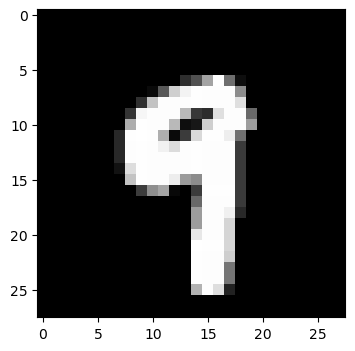

In [2]:
n = np.random.randint(0,10000,1)

plt.figure(figsize = (4,4))
plt.imshow(x_test[n].reshape(28, 28), cmap = 'gray')

print('The Answer is ', np.argmax(model.predict(x_test[n]), axis = -1))

In [4]:
# read
batch_size = 128 # mini-batch의 크기
num_classes = 10 # class의 개수
epochs = 5 # epoch을 몇번 돌건지

# preprocess, 흑백이라서 channel = 1 
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# CNN model, conv2D는 2차원 컨볼류션 layer / 20의 의미는 kernel 20개 쓴다. 
model = Sequential()
model.add(Conv2D(20, kernel_size = (4, 4), strides = (7, 4), padding = 'same', activation = 'relu',input_shape=input_shape))
model.add(Conv2D(50, kernel_size = (4, 4), strides = (4, 4), padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()
# parameter 340인 이유 : {(4,4)kernel + bias 파라미터 1개} x 20
# parameter 16050인 이유 : 20*50*16 + 50
# output shape 은 한 그림에서 나오는 개수 의미 = channel

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                 verbose = 1, validation_data = (x_test, y_test))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 4, 7, 20)          340       
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 2, 50)          16050     
                                                                 
 flatten_2 (Flatten)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 27,500
Trainable params: 27,500
Non-trainable params: 0
___________________________________________

In [ ]:
n = np.random.randint(0,10000,1)

plt.figure(figsize = (4,4))
plt.imshow(x_test[n].reshape(28, 28), cmap = 'gray')

print('The Answer is ', np.argmax(model.predict(x_test[n]), axis = -1))